In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("Uni_linear.txt", header=None)

In [3]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()


,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 1.0, 'Profit Prediction')

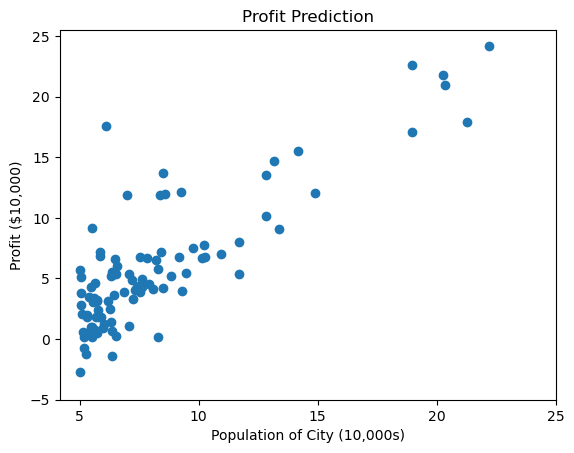

In [6]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000)")
plt.title("Profit Prediction")

# Compute the cost function ($J\Theta$)


In [15]:
def computeCost(X,y,theta):
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions-y)**2
    return 1/(2*m)*np.sum(square_err)

In [16]:
data_n=data.values
m=data_n[:,0].size
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1))

computeCost(X,y,theta)

32.072733877455676

Gradient Descent

Minimize the cost function $J(\Theta$)

In [17]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history=[]
    for i in range(num_iters):
        predictions=X.dot(theta)
        error=np.dot(X.transpose(),(predictions-y))
        descent=alpha*1/m*error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    return theta,J_history
        

In [19]:
theta,J_history=gradientDescent(X,y,theta,0.01,1500)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) =-3.88 + 1.19x1


In [21]:
from mpl_toolkits.mplot3d import Axes3D

In [23]:
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)

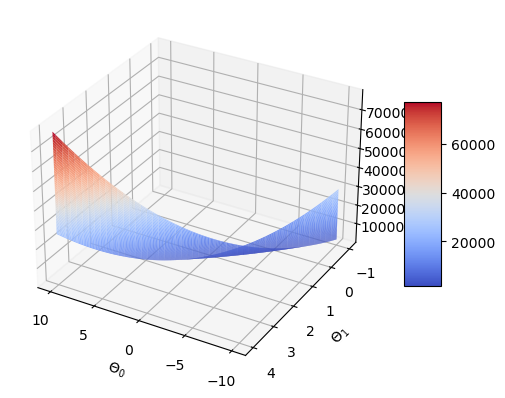

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf,shrink=0.5,aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30,120)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

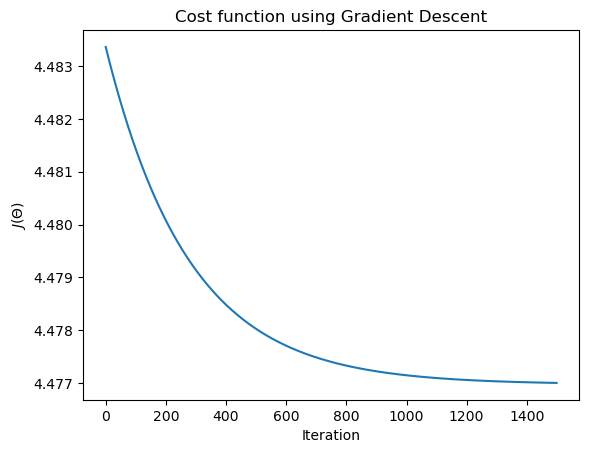

In [26]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Text(0.5, 1.0, 'Profit Prediction')

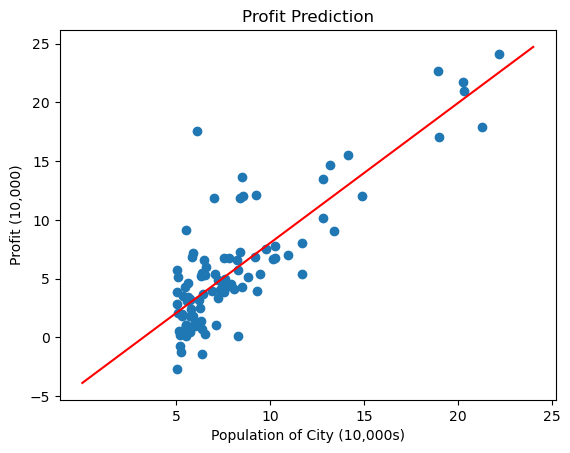

In [30]:
plt.scatter(data[0],data[1])
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit (10,000)")
plt.title("Profit Prediction")


Make predictions using the optimized $\Theta$ values

In [32]:
def predict(x,theta):
    predictions=np.dot(theta.transpose(),x)
    return predictions[0]

In [33]:
predict1=predict(np.array([1,3.5]),theta)*10000
print("For population=35000, we predict a profitof $" +str(round(predict1,0)))

For population=35000, we predict a profitof $2913.0


In [36]:
predict2=predict(np.array([1,7]),theta)*10000
print("For population=70,000, we predict a profitof $" +str(round(predict2,0)))

For population=70,000, we predict a profitof $44607.0


# Multivariable Linear Regression


Loading Data

In [37]:
data2=pd.read_csv("Multi_linear.txt",header=None)

In [38]:
data2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [39]:
data2.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


Plotting of Data

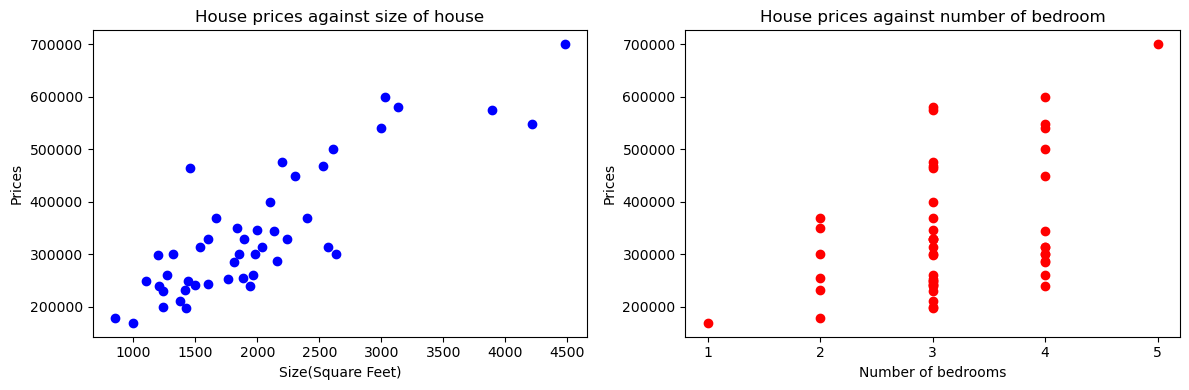

In [43]:
fig,axes=plt.subplots(figsize=(12,4),nrows=1,ncols=2)
axes[0].scatter(data2[0],data2[2],color="b")
axes[0].set_xlabel("Size(Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")
axes[1].scatter(data2[1],data2[2],color="r")
axes[1].set_xlabel("Number of bedrooms")
axes[1].set_ylabel("Prices")
axes[1].set_xticks(np.arange(1,6,step=1))
axes[1].set_title("House prices against number of bedroom")
plt.tight_layout()

Feature Normalization

In [47]:
def featureNormalization(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_norm=(X-mean)/std
    return X_norm, mean,std

In [50]:
data_n2=data2.values
m2=len(data_n2[:,-1])
X2=data_n2[:,0:2].reshape(m2,2)
X2,mean_X2,std_X2=featureNormalization(X2)
X2=np.append(np.ones((m2,1)),X2,axis=1)
y2=data_n2[:,-1].reshape(m2,1)
theta2=np.zeros((3,1))

Compute Cost $J(\Theta$)

In [51]:
computeCost(X2,y2,theta2)

65591548106.45744

Gradient Descent

In [61]:
theta2,J_history2=gradientDescent(X2,y2,theta2,0.1,400)
print("h(x) ="+str(round(theta2[0,0],2))+"+"+str(round(theta2[1,0],2))+"x1 +"+str(round(theta2[2,0],))+"x2")

h(x) =340412.66+109447.8x1 +-6578x2


Visualizing the Cost Funcition $J(\Theta$)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

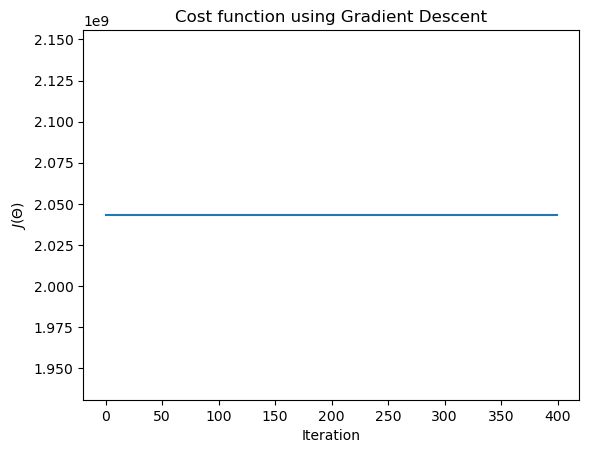

In [62]:
plt.plot(J_history2)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Make predictiosn using the optimized $\Theta$ Values

In [63]:
x_sample=featureNormalization(np.array([1650,3]))[0]

In [65]:
x_sample=np.append(np.ones(1),x_sample)
predict3=predict(x_sample,theta2)
print("For size of house=1650, Number of bedroom=3,we predict a house value of $" +str(round(predict3,0)))

For size of house=1650, Number of bedroom=3,we predict a house value of $456439.0
